<a href="https://colab.research.google.com/github/sagar9926/ImportantConcepts-/blob/master/Python/Sigmoid_Neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting Sigmoid Function

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.colors
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook

$S_{w, b}(x) = \frac{1}{1 + e^{-(wx + b)}}$

In [0]:
def sigmoid(x, w, b):
  return 1/(1 + np.exp(-(w*x + b)))

In [3]:
sigmoid(1,0.5,0)

0.6224593312018546

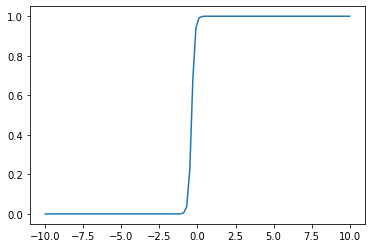

In [4]:
w = 10  #@param {type: "slider", min: -2, max: 10, step: 0.1}
b = 3.8  #@param {type: "slider", min: -5, max: 5, step: 0.1}

X = np.linspace(-10,10,100)
y = sigmoid(X,w,b) # function is called for every element in numpy array

plt.plot(X,y)
plt.show()

# Sigmoid 2D
$S_{w_1, w_2, b}(x_1, x_2) = \frac{1}{1 + e^{-(w_1x_1 + w_2x_2 + b)}}$

In [0]:
def sigmoid_2d(X1,X2,w1,w2,b):
  return(1/(1 + np.exp(-(w1*X1 +w2*X2 + b))))

In [6]:
sigmoid_2d(1, 0, 0.5, 0, 0)

0.6224593312018546

In [7]:
X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)

# we need to find the output y for all possible combination of input

XX1 , XX2 = np.meshgrid(X1,X2)

print(X1.shape,X2.shape,XX1.shape,XX2.shape)

(100,) (100,) (100, 100) (100, 100)


In [8]:
a = np.array([1,2])
b = np.array([3,4])
x,y = np.meshgrid(a,b)
print(x)


[[1 2]
 [1 2]]


In [0]:
w1 = -0.3
w2 = -0.5
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

#Contour plot

In [0]:
import matplotlib.colors
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

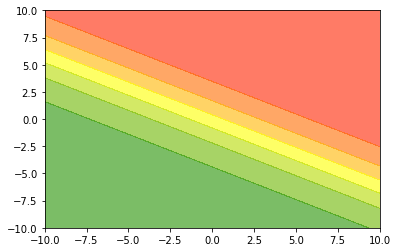

In [11]:
plt.contourf(XX1,XX2,Y,cmap = my_cmap,alpha = 0.6)
plt.show()

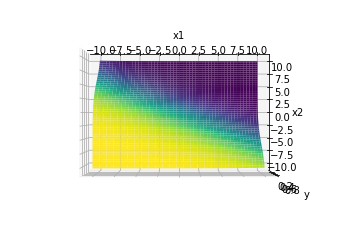

In [12]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(90, 270) #90 means vieing from the top


# Compute Loss for a Given Dataset

In [0]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 - 10
Y = sigmoid(X, w_unknown, b_unknown)

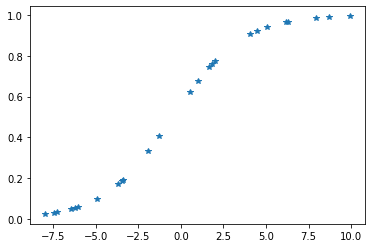

In [14]:
plt.plot(X,Y,"*")
plt.show()

In [0]:
def calculate_loss(X,Y,w_est,b_est):
  loss = 0
  for x,y in zip(X,Y):
    loss += (y - sigmoid(x,w_est,b_est))**2
  return(loss)

In [0]:
W = np.linspace(0,2,100)
B = np.linspace(-1,1,100)

WW,BB = np.meshgrid(W,B)

Loss = np.zeros(WW.shape)

In [17]:
WW.shape

(100, 100)

In [0]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i][j] = calculate_loss(X, Y, WW[i][j], BB[i][j])
    


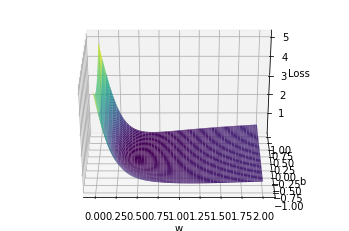

In [19]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_surface(WW,BB,Loss,cmap = 'viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')

ax.view_init(30,270)

In [0]:
ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i * Loss.shape[1])

In [21]:
print(i, j)

print(WW[i][j], BB[i][j])

62 25
0.5050505050505051 0.2525252525252526


# Class For Sigmoid Neuron

In [0]:
class SigmoidNeuron:

  def __init__(self):
    self.w = None
    self.b = None

  def perceptron(self,x):
    return((np.dot(x,self.w.T) + self.b))

  def sigmoid(self,x):
    return(1.0/(1.0 + np.exp(-x)))

  def grad_w(self,x,y):
    y_pred = self.sigmoid(self.perceptron(x))
    return((y_pred - y)*y_pred*(1 - y_pred)*x)

  def grad_b(self,x,y):
    y_pred = self.sigmoid(self.perceptron(x))
    return((y_pred - y)*y_pred*(1 - y_pred))

  def fit(self,X,Y,epochs = 1, learning_rate = 1, initialise = True,display_loss = False):

    # initialise w and b randomly ( this should not happen every time, if randomly initialised at start of every epoch then there is no learning carried
    # forward from previous epoch )
    if initialise:
      self.w = np.random.randn(1,X.shape[1])  # size = 1 x number of columns
      # X.shape[1] denotes the number of columns and we know that we need weights correspondong to every column
      # shape of weight matrix depends upon the number of paramerers in each iteration of prediction i.e number of columns/ features
      self.b = 0

    if display_loss:
      loss = {}

    for i in range(epochs):
      dw = 0
      db = 0
      for x,y in zip(X,Y) :
      # total gradient is calculated by summing up individual gradients in an epoch
        dw += self.grad_w(x,y) # total gradient is calculated by summing up individual data point gradients
        db += self.grad_b(x,y)
      
      # the number of updates to parameter model is equal to the total number of epochs
      self.w -= learning_rate * dw
      self.b -= learning_rate * db

      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        loss[i] = mean_squared_error(Y_pred,Y)

    if display_loss:
      plt.plot(list(loss.values()))
      plt.xlabel("Epochs")
      plt.ylabel("Mean Squared Error")
      plt.show()


  def predict(self,X):
    Y_pred = []
    for x in X:
      y_pred = (self.sigmoid(self.perceptron(x)))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

      

In [124]:
a = np.array([[1,2],[3,4],[5,6]])
w = np.array([3,4])
print(np.dot(a,w))
loss = {}
loss[0] =mean_squared_error([3,3,3],np.dot(a,w))
print(list(loss.values()))

[11 25 39]
[614.6666666666666]


# Applying sigmoid neuron on toy data

In [0]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = [1, 1, 1, 0, 0, 0]

In [0]:
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.25, True)

In [25]:
print(sn.w,sn.b)

[[0.6413762  0.74474626]] [-0.00172394]


In [26]:
for i in range(10):
  print(sn.w,sn.b)
  sn.fit(X,Y,1,0.25,False)

[[0.6413762  0.74474626]] [-0.00172394]
[[0.71390446 0.63621743]] [0.004561]
[[0.76980753 0.49771216]] [0.01933121]
[[0.81721528 0.31290581]] [0.04104116]
[[0.85033137 0.08359779]] [0.05725246]
[[ 0.85476593 -0.14858463]] [0.04228433]
[[ 0.86648233 -0.28566294]] [0.00713574]
[[ 0.90988107 -0.30397952]] [-0.02478267]
[[ 0.95124569 -0.31706819]] [-0.05489227]
[[ 0.98966344 -0.32936839]] [-0.08343047]


In [0]:
def plot_sn(X,Y,sn,ax):
  X1 = np.linspace(-10,10,100)
  X2 = np.linspace(-10,10,100)
  XX1,XX2 = np.meshgrid(X1,X2) # these represents all the combinations of X1 and X2 
  # X1 aur X2 me current weight aur bias ka multiply karke hi to apan model nem kya learn kiya hai abata sakte hain 
  YY = np.zeros(XX1.shape) # YY will store the output of model at every instant of X1 and X2
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i][j] = sn.sigmoid(sn.perceptron(val)) #using the weights and biases learned here we find the sigmoid plot that the model is currently like 
  ax.contourf(XX1, XX2, YY, cmap=my_cmap, alpha=0.6)
  ax.scatter(X[:,0], X[:,1],c=Y, cmap=my_cmap) #plotting the positive and negetive scattered points on the sigmoid plot learnt
  ax.plot()



In [28]:
  X1 = np.linspace(-10,10,100)
  X2 = np.linspace(-10,10,100)
  XX1,XX2 = np.meshgrid(X1,X2) # these represents all the combinations of X1 and X2 
  # X1 aur X2 me current weight aur bias ka multiply karke hi to apan model nem kya learn kiya hai abata sakte hain 
  YY = np.zeros(XX1.shape) # YY will store the output of model at every instant of X1 and X2
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      print(val)

Streaming output truncated to the last 5000 lines.
[-9.7979798  0.1010101]
[-9.5959596  0.1010101]
[-9.39393939  0.1010101 ]
[-9.19191919  0.1010101 ]
[-8.98989899  0.1010101 ]
[-8.78787879  0.1010101 ]
[-8.58585859  0.1010101 ]
[-8.38383838  0.1010101 ]
[-8.18181818  0.1010101 ]
[-7.97979798  0.1010101 ]
[-7.77777778  0.1010101 ]
[-7.57575758  0.1010101 ]
[-7.37373737  0.1010101 ]
[-7.17171717  0.1010101 ]
[-6.96969697  0.1010101 ]
[-6.76767677  0.1010101 ]
[-6.56565657  0.1010101 ]
[-6.36363636  0.1010101 ]
[-6.16161616  0.1010101 ]
[-5.95959596  0.1010101 ]
[-5.75757576  0.1010101 ]
[-5.55555556  0.1010101 ]
[-5.35353535  0.1010101 ]
[-5.15151515  0.1010101 ]
[-4.94949495  0.1010101 ]
[-4.74747475  0.1010101 ]
[-4.54545455  0.1010101 ]
[-4.34343434  0.1010101 ]
[-4.14141414  0.1010101 ]
[-3.93939394  0.1010101 ]
[-3.73737374  0.1010101 ]
[-3.53535354  0.1010101 ]
[-3.33333333  0.1010101 ]
[-3.13131313  0.1010101 ]
[-2.92929293  0.1010101 ]
[-2.72727273  0.1010101 ]
[-2.52525253  0.1

[[ 0.80169288 -0.32099652]] [-0.0058464]
[[ 0.93435858 -0.25340139]] [-0.06467591]
[[ 0.98242416 -0.38246715]] [-0.1239471]
[[ 1.08724986 -0.31087449]] [-0.17161889]
[[ 1.12318759 -0.40983242]] [-0.220312]
[[ 1.19953817 -0.37045916]] [-0.25979374]
[[ 1.23724835 -0.4232011 ]] [-0.29883062]
[[ 1.29018331 -0.41796237]] [-0.33239441]
[[ 1.32900946 -0.44078296]] [-0.36429095]
[[ 1.36916786 -0.44975733]] [-0.39323875]
[[ 1.40491201 -0.46254405]] [-0.42026203]
[[ 1.4387519  -0.47315315]] [-0.44535486]
[[ 1.47035752 -0.48341207]] [-0.46880349]
[[ 1.50010685 -0.49300527]] [-0.49077098]
[[ 1.52817709 -0.50206528]] [-0.51141524]
[[ 1.55474245 -0.51063921]] [-0.53086947]
[[ 1.57994964 -0.51877515]] [-0.54924942]
[[ 1.60392558 -0.52651409]] [-0.56665586]
[[ 1.62678059 -0.53389168]] [-0.58317689]
[[ 1.64861112 -0.54093907]] [-0.59888989]
[[ 1.66950196 -0.54768364]] [-0.61386308]
[[ 1.68952801 -0.55414958]] [-0.62815688]
[[ 1.70875575 -0.56035834]] [-0.64182499]
[[ 1.72724441 -0.56632905]] [-0.654915

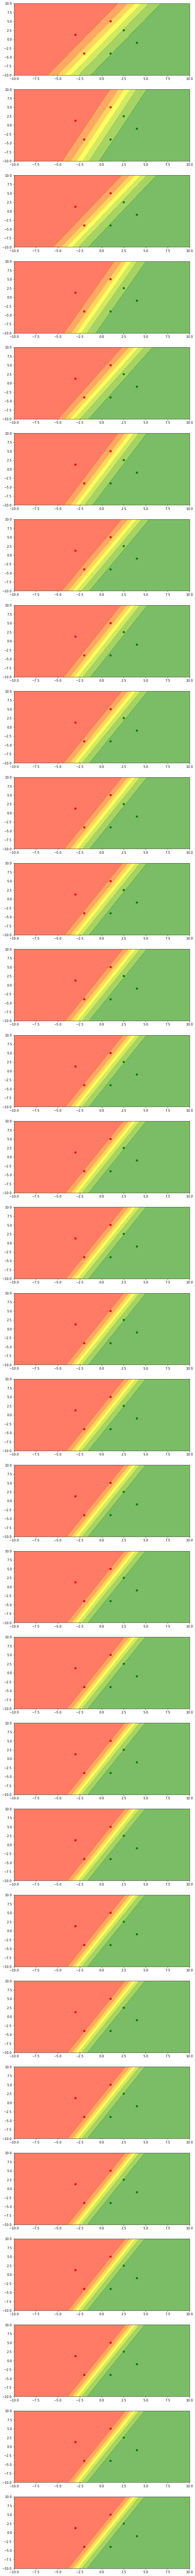

In [29]:
sn.fit(X, Y, 1, 0.05, True)
N = 30
plt.figure(figsize=(10, N*5))
for i in range(N):
  print(sn.w, sn.b)
  ax = plt.subplot(N, 1, i + 1)
  plot_sn(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.5, False)

# Load Data

In [0]:
data = pd.read_csv("https://raw.githubusercontent.com/bhadauria/Data/master/mobile_cleaned.csv")#, error_bad_lines=False)

In [31]:
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,...,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,25,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,24,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,16,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4


In [32]:
data.shape

(341, 88)

In [0]:
X = data.drop('Rating', axis=1)

Y = data['Rating'].values

In [0]:
threshold = 4.2
data['Class'] = (data['Rating'] >= threshold).astype(np.int)

In [35]:
data['Class'].value_counts(normalize=True)

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [0]:
Y_binarised = data['Class'].values

# Standardising Data

Data can be variable.

Making the mean  = 0 and sd  = `1


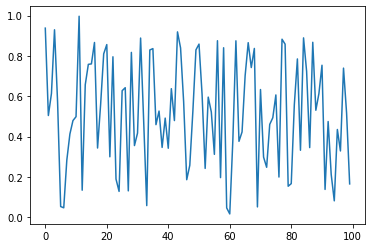

In [37]:
R = np.random.random([100,1])
plt.plot(R)
plt.show()

In [38]:
R

array([[0.93794025],
       [0.50435889],
       [0.61347187],
       [0.9299055 ],
       [0.57137337],
       [0.05263753],
       [0.04628313],
       [0.28275056],
       [0.41229936],
       [0.47922647],
       [0.4984919 ],
       [0.99706327],
       [0.13361771],
       [0.65737513],
       [0.75825318],
       [0.76062521],
       [0.8668245 ],
       [0.34301168],
       [0.55978489],
       [0.81056481],
       [0.85638795],
       [0.29945779],
       [0.79584375],
       [0.18889416],
       [0.12774163],
       [0.62753845],
       [0.64236445],
       [0.13034394],
       [0.817627  ],
       [0.35518713],
       [0.41705656],
       [0.88884473],
       [0.47661066],
       [0.05720725],
       [0.82963632],
       [0.83646723],
       [0.45899703],
       [0.52643034],
       [0.34601534],
       [0.49150358],
       [0.34193052],
       [0.63758173],
       [0.47926784],
       [0.91950343],
       [0.83970973],
       [0.57284817],
       [0.18574821],
       [0.257

In [39]:
np.mean(R)

0.5182484590160183

In [40]:
np.std(R)

0.26955908850114785

In [41]:
scaler = StandardScaler()
scaler.fit(R)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [42]:
scaler.mean_

array([0.51824846])

In [0]:
RT = scaler.transform(R)

In [44]:
np.mean(RT)

1.1990408665951691e-16

In [45]:
np.std(RT)

0.9999999999999999

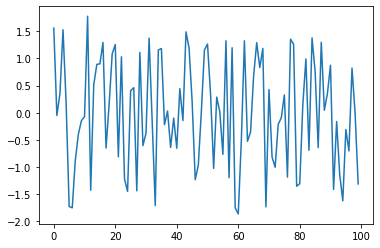

In [46]:
plt.plot(RT)
plt.show()

# Standardising the dataframe

1. Perform train test split first

2. Calculate the mean and standard deviation on training data and use it to standardise the train data

3. Using the train mean and standard deviation of the train data perform standardisation on test data

In [57]:
X.head(2)

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,...,Brand_Lyf,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, stratify=Y_binarised)

In [58]:
X_train.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,...,Brand_Lyf,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G
293,408,267,5.50,163,4,1.50,71.88,151.5,32,3020,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
59,77,270,6.22,152,4,2.00,82.33,155.2,64,3260,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
340,472,401,5.50,153,3,1.80,74.21,151.1,32,3000,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
294,409,167,2.40,161,8,1.79,30.49,116.4,32,1100,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
43,60,463,5.80,174,3,2.39,80.93,143.6,64,2716,7,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1


In [48]:
print(X_train.shape, X_test.shape)

(255, 87) (86, 87)


In [0]:
scaler = StandardScaler()

X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [50]:
len(scaler.mean_) # mean value corresponding to each and every column

87

In [0]:
minmax_scaler = MinMaxScaler()

In [0]:
Y_scaled_train = minmax_scaler.fit_transform(Y_train.reshape(-1, 1))
Y_scaled_test = minmax_scaler.transform(Y_test.reshape(-1, 1))

In [0]:
scaled_threshold = list(minmax_scaler.transform(np.array([threshold]).reshape(1, -1)))[0][0]

In [0]:
Y_binarised_train = (Y_scaled_train > scaled_threshold).astype("int").ravel()

Y_binarised_test = (Y_scaled_test > scaled_threshold).astype("int").ravel()

In [61]:
len(X_scaled_train[0])

87

# Train on Real Data

In [0]:
sn = SigmoidNeuron()

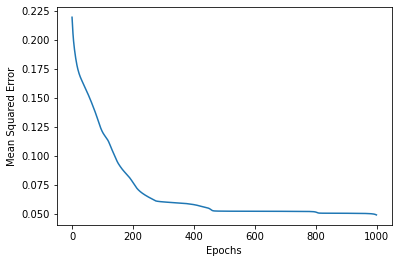

In [127]:
sn.fit(X_scaled_train, Y_scaled_train, epochs=1000, learning_rate=0.01,display_loss=True)

In [128]:
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)

Y_pred_binarised_train = (Y_pred_train > scaled_threshold).astype("int").ravel()
Y_pred_binarised_test = (Y_pred_test > scaled_threshold).astype("int").ravel()

accuracy_train = accuracy_score(Y_pred_binarised_train, Y_binarised_train)
accuracy_test  = accuracy_score(Y_pred_binarised_test, Y_binarised_test)

print(accuracy_train, accuracy_test)

0.7686274509803922 0.7093023255813954
